In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

In [42]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [5]:
file = open('predicate-matrix-continuous.txt', "r")
attr = []
for line in file:
    p = line.strip().split()
    p = [float(i) for i in p]
    attr.append(p)

In [31]:
file = open('classes.txt', "r")
animals = []
for line in file:
    p = line.strip().split()
#     animals[int(p[0])] = p[1]
    animals.append(p[1])

In [18]:
Z = linkage(attr, 'ward')

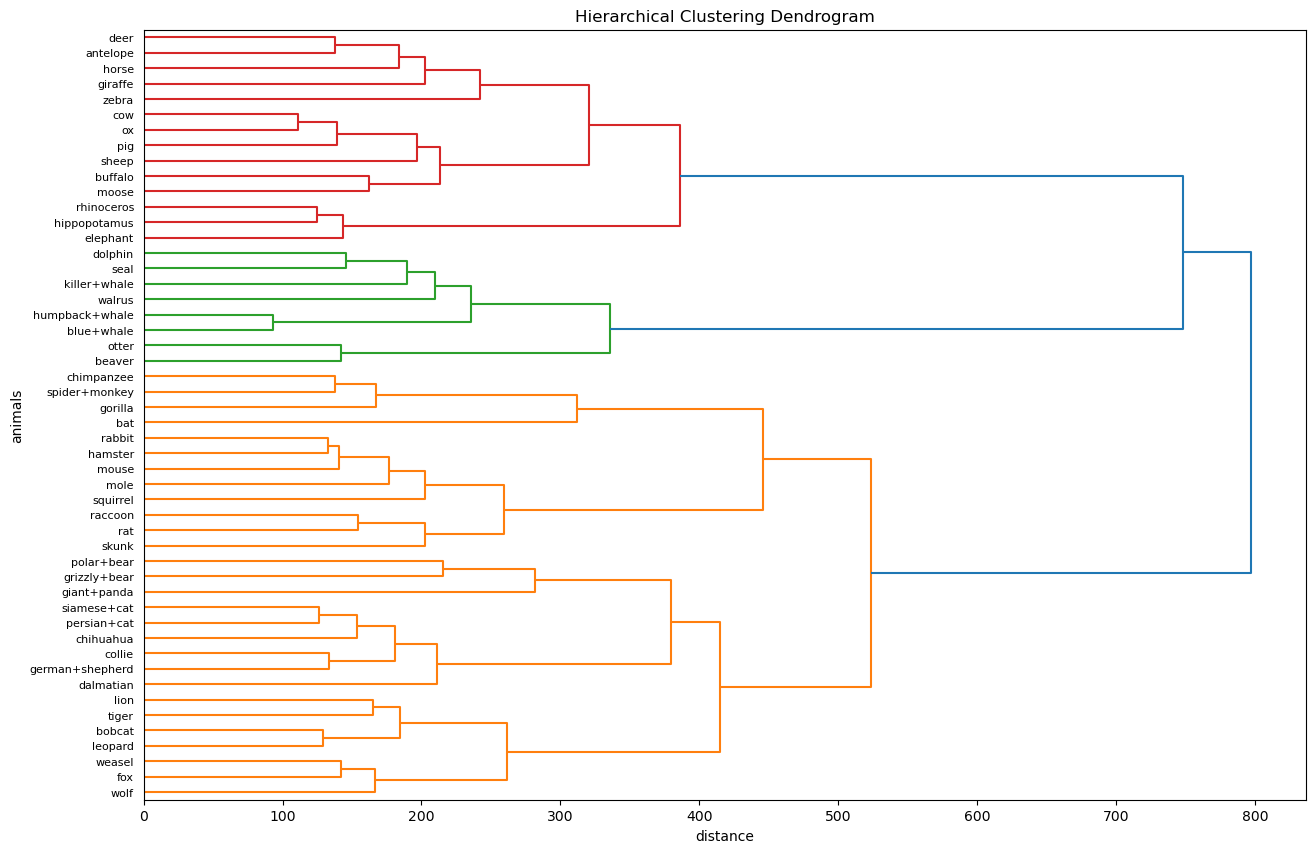

In [40]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('animals')
dendrogram(
    Z, orientation='right', labels = animals
#     leaf_rotation=90.,  # rotates the x axis labels
#     leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [47]:
clus = cut_tree(Z, n_clusters = [10])
clus = [list(i)[0] for i in list(clus)]

In [48]:
groups = {}
for i in range(10):
    groups[i] = []

In [51]:
for i in range(50):
    groups[clus[i]].append(animals[i])

In [65]:
for i in range(10):
    c = ", ".join(j for j in groups[i])
    print("Cluster " + str(i+1)+": "+ c)

Cluster 1: antelope, horse, giraffe, zebra, deer
Cluster 2: grizzly+bear, giant+panda, polar+bear
Cluster 3: killer+whale, blue+whale, humpback+whale, seal, walrus, dolphin
Cluster 4: beaver, otter
Cluster 5: dalmatian, persian+cat, german+shepherd, siamese+cat, chihuahua, collie
Cluster 6: skunk, mole, hamster, squirrel, rabbit, rat, mouse, raccoon
Cluster 7: tiger, leopard, fox, wolf, weasel, bobcat, lion
Cluster 8: hippopotamus, elephant, rhinoceros
Cluster 9: moose, ox, sheep, buffalo, pig, cow
Cluster 10: spider+monkey, gorilla, chimpanzee, bat


In [67]:
feat_clus = {}
for i in range(10):
    feat_clus[i] = []
for i in range(50):
    feat_clus[clus[i]].append(attr[i])

In [88]:
centroids = {}
for i in range(10):
    l = len(feat_clus[i])
#     print(l)
    centroids[i] = [sum(n)/l for n in zip(*feat_clus[i])]

In [91]:
len(centroids[0])

85

In [94]:
def dist(list1,list2):
    ans = 0.0
    for i in range(len(list1)):
        ans += pow((list1[i]-list2[i]),2)
    return ans

In [101]:
cost = 0.0
for i in range(50):
#     print(clus[i])
    cost += dist(attr[i],centroids[clus[i]])
print(cost)

679136.2672672619


## K Means

In [119]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, init='random', random_state=0).fit(attr)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [120]:
clus = list(kmeans.labels_)
groups = {}
for i in range(10):
    groups[i] = []
for i in range(50):
    groups[clus[i]].append(animals[i])
for i in range(10):
    c = ", ".join(j for j in groups[i])
    print("Cluster " + str(i+1)+": "+ c)

Cluster 1: hamster, rabbit
Cluster 2: killer+whale, blue+whale, humpback+whale, seal, walrus, dolphin
Cluster 3: beaver, otter
Cluster 4: dalmatian, persian+cat, german+shepherd, siamese+cat, chihuahua, collie
Cluster 5: grizzly+bear, tiger, leopard, fox, wolf, bobcat, lion, polar+bear
Cluster 6: hippopotamus, elephant, rhinoceros, buffalo, pig
Cluster 7: spider+monkey, gorilla, chimpanzee, giant+panda
Cluster 8: skunk, mole, squirrel, bat, rat, weasel, mouse, raccoon
Cluster 9: horse, ox, sheep, zebra, cow
Cluster 10: antelope, moose, giraffe, deer


In [121]:
feat_clus = {}
for i in range(10):
    feat_clus[i] = []
for i in range(50):
    feat_clus[clus[i]].append(attr[i])

In [122]:
centroids = {}
for i in range(10):
    l = len(feat_clus[i])
#     print(l)
    centroids[i] = [sum(n)/l for n in zip(*feat_clus[i])]

In [123]:
cost = 0.0
for i in range(50):
#     print(clus[i])
    cost += dist(attr[i],centroids[clus[i]])
print(cost)

727677.8833250003


In [124]:
kmeans.inertia_

727677.8833250001

In [127]:
for i in range(20):
    print(i)
    kmeans = KMeans(n_clusters=10, init='random', random_state=i).fit(attr)
    clus = list(kmeans.labels_)
    groups = {}
    for i in range(10):
        groups[i] = []
    for i in range(50):
        groups[clus[i]].append(animals[i])
    for i in range(10):
        c = ", ".join(j for j in groups[i])
        print("Cluster " + str(i+1)+": "+ c)
#     feat_clus = {}
#     for i in range(10):
#         feat_clus[i] = []
#     for i in range(50):
#         feat_clus[clus[i]].append(attr[i])
#     centroids = {}
#     for i in range(10):
#         l = len(feat_clus[i])
#     #     print(l)
#         centroids[i] = [sum(n)/l for n in zip(*feat_clus[i])]
    cost = kmeans.inertia_
    print(cost)
    print("***************")

0
Cluster 1: hamster, rabbit
Cluster 2: killer+whale, blue+whale, humpback+whale, seal, walrus, dolphin
Cluster 3: beaver, otter
Cluster 4: dalmatian, persian+cat, german+shepherd, siamese+cat, chihuahua, collie
Cluster 5: grizzly+bear, tiger, leopard, fox, wolf, bobcat, lion, polar+bear
Cluster 6: hippopotamus, elephant, rhinoceros, buffalo, pig
Cluster 7: spider+monkey, gorilla, chimpanzee, giant+panda
Cluster 8: skunk, mole, squirrel, bat, rat, weasel, mouse, raccoon
Cluster 9: horse, ox, sheep, zebra, cow
Cluster 10: antelope, moose, giraffe, deer
727677.8833250001
***************
1
Cluster 1: hippopotamus, elephant, ox, sheep, rhinoceros, buffalo, zebra, giant+panda, pig, cow
Cluster 2: antelope, horse, moose, giraffe, deer
Cluster 3: spider+monkey, gorilla, chimpanzee, bat
Cluster 4: beaver, mole, hamster, squirrel, rabbit, rat, weasel, mouse
Cluster 5: polar+bear
Cluster 6: dalmatian, persian+cat, german+shepherd, siamese+cat, chihuahua, collie
Cluster 7: grizzly+bear
Cluster 8:

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

Cluster 1: grizzly+bear, giant+panda, polar+bear
Cluster 2: beaver, otter
Cluster 3: skunk, mole, hamster, squirrel, rabbit, rat, mouse, raccoon
Cluster 4: killer+whale, blue+whale, humpback+whale, seal, walrus, dolphin
Cluster 5: dalmatian, persian+cat, german+shepherd, siamese+cat, chihuahua, weasel, collie
Cluster 6: hippopotamus, elephant, rhinoceros, pig
Cluster 7: bat
Cluster 8: spider+monkey, gorilla, chimpanzee
Cluster 9: tiger, leopard, fox, wolf, bobcat, lion
Cluster 10: antelope, horse, moose, ox, sheep, giraffe, buffalo, zebra, deer, cow
677403.047434881
***************
18
Cluster 1: dalmatian, persian+cat, siamese+cat, skunk, chihuahua, rat, weasel, collie
Cluster 2: moose, ox, sheep, buffalo, giant+panda, pig, cow
Cluster 3: killer+whale, blue+whale, humpback+whale, seal, otter, walrus, dolphin
Cluster 4: horse, zebra
Cluster 5: hippopotamus, elephant, rhinoceros
Cluster 6: spider+monkey, gorilla, chimpanzee, bat
Cluster 7: german+shepherd, tiger, leopard, fox, wolf, bobc

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
